# 2. Pre-Processing

In [1]:
# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set graph defaults
plt.rc('font', family='serif', size=10)
plt.rc('legend', fontsize=10)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['axes.unicode_minus'] = False

# Read in data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Read in data summary
data_summary = pd.read_csv("data_summary.csv", index_col=0)

### 2.1 Data Cleaning

In [2]:
# Identify rows with missing data
cols_missing = data_summary[data_summary["min"] == -9999.0].index.to_list()
rows_missing = []
for i in cols_missing:
    rows_missing = rows_missing + X_train[X_train["rowv"] == -9999.0].index.to_list()

# Remove rows with missing data
X_train_clean = X_train.drop(rows_missing)

# Identify rows with data more than five standard deviations away from the mean
cols_outlier = []
rows_outlier = []
for i in X_train.columns.to_list():
    diff = abs(X_train_clean[i] - data_summary.loc[i]["mean"]) / data_summary.loc[i]["std"]
    diff_rows = diff[diff > 10].index.to_list()
    rows_outlier = rows_outlier + diff_rows
    if len(diff_rows) > 0:
        cols_outlier.append(i)

# Remove rows with outlier data
X_train_clean = X_train_clean.drop(rows_outlier)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train_clean)
X_train_clean = pd.DataFrame(scaler.transform(X_train_clean))
X_train_clean.columns = X_train.columns

### 2.2 PCA Dimensionality Reduction

Principal components:
                    PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
ra            -0.005654 -0.026821  0.008912  0.044455  0.037916  0.054907   
dec           -0.012638 -0.212925  0.024009 -0.059096 -0.038083 -0.010142   
rowv          -0.000142  0.000255 -0.009676  0.000278 -0.002782  0.001697   
colv           0.000507 -0.003065 -0.005602  0.001141  0.003822 -0.000652   
sky_u          0.013261  0.258823 -0.025575 -0.041666 -0.044011 -0.017615   
...                 ...       ...       ...       ...       ...       ...   
spectroFlux_u  0.164272 -0.021006 -0.075946 -0.020193 -0.001021  0.063013   
spectroFlux_g  0.195593 -0.014495 -0.037030 -0.015529 -0.006908  0.080548   
spectroFlux_r  0.199957 -0.007194  0.001552 -0.008805 -0.009781  0.077644   
spectroFlux_i  0.197539 -0.002873  0.025363 -0.004186 -0.010785  0.070250   
spectroFlux_z  0.193591  0.000874  0.046045  0.000826 -0.010928  0.058267   

                   PCA7      PCA8      PCA9     PCA1

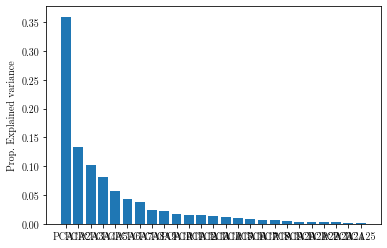

In [7]:
# Get principal components
K = 25
columns= ["PCA" + str(i + 1) for i in range(K)]
pca = PCA(n_components = K)
pca.fit(X_train_clean)

# Label principal components
V = pd.DataFrame(data=pca.components_.T,
                 columns=columns,
                 index=X_train_clean.columns)
print('Principal components:\n', V) 

# Calculate eigenvalues of the projections
lam = pca.explained_variance_
print('\n Eigenvalues/variance of the projections:\n', lam)

# Proportion of variance explained
Normalised_lam = pca.explained_variance_ratio_
print('\nProportion of variance explained:\n ', Normalised_lam)
plt.figure()
plt.bar(columns, Normalised_lam)
plt.ylabel('Prop. Explained variance')

# Compute the projections onto the principal components
Z_pca = pca.transform(X_train_clean)
X_train_clean_pca = pd.DataFrame(Z_pca, columns=columns)

In [9]:
# Export data
X_train_clean_pca.to_csv("X_train_clean_pca.csv", index=True)